<a href="https://colab.research.google.com/github/aswinigh/Cloth-simulation/blob/master/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
df_x = pd.read_csv('/content/simulation_data_x.csv')
df_x.head()

,Vertex,x,y,z
0,0,-1.152159,1.342954,6.992544
1,1,2.852337,1.264610,6.992576
2,2,-1.042415,5.126107,7.075998
3,3,2.789885,5.267794,6.992542
4,4,-1.061237,4.940754,7.177060


In [102]:
len(df_x)

64000

In [0]:
no_scenes = 8

In [0]:
import matplotlib.pyplot as plt

In [0]:
scene = []
for j in range(no_scenes):
  frame = []
  for i in range(20):
    frame.append(df_x[j*8000+i*400:j*8000+i*400+400])
  scene.append(frame)

In [196]:
scene[1][5][' x ']

10000   -1.285718
10001    1.585891
10002   -0.805228
10003    1.252038
10004   -0.825577
           ...   
10395    1.833896
10396    1.776879
10397    1.653122
10398    1.528820
10399    1.398605
Name:  x , Length: 400, dtype: float64

# Data Exploration
We plot the means and standard deviations changing with respect to frame count(time)

In [0]:
means_x = [scene[0][i][' x '].astype(float).mean() for i in range(20)]
means_y = [scene[0][i][' y '].astype(float).mean() for i in range(20)]
means_z = [scene[0][i][' z '].astype(float).mean() for i in range(20)]

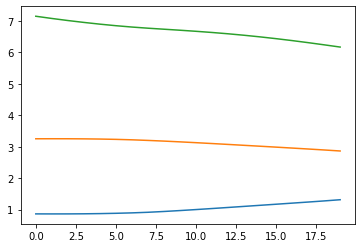

In [33]:
plt.plot([i for i in range(20)], means_x)
plt.plot([i for i in range(20)], means_y)
plt.plot([i for i in range(20)], means_z)
plt.show()

In [0]:
std_x = [scene[0][i][' x '].std() for i in range(20)]
std_y = [scene[0][i][' y '].std() for i in range(20)]
std_z = [scene[0][i][' z '].std() for i in range(20)]

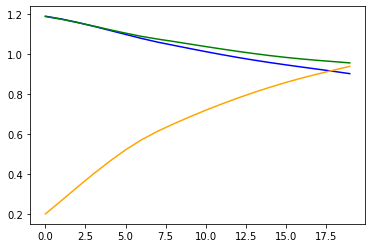

In [35]:
plt.plot([i for i in range(20)], std_x, color='blue')
plt.plot([i for i in range(20)], std_y, color='green')
plt.plot([i for i in range(20)], std_z, color='orange')
plt.show()

In [0]:
from mpl_toolkits.mplot3d import axes3d

def plot_frame(i,j):
  fig = plt.figure()
  #ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
  ax = fig.gca(projection='3d')
  ax.set_zlim3d(-8,5)
  ax.scatter(scene[i][j][' x '],scene[i][j][' y '],scene[i][j][' z '])

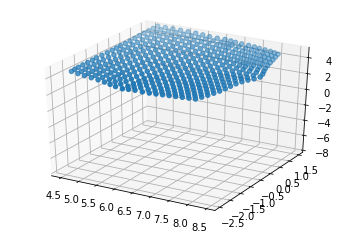

In [199]:
plot_frame(4,19)


# Data preperation

1.   We keep all the vertices for each frame in a single vector x(t) where t is the frame.
2.   We make a matrix X combining all the x(t) into a single matrix.



In [0]:
frame = scene
for i in range(no_scenes):
  for t in range(20):
    frame[i][t] = frame[i][t].drop('Vertex ',axis=1)
    frame[i][t] = frame[i][t].values.flatten()

In [39]:
frame[0][0].shape

(1200,)

In [0]:
allframes = []
for i in range(no_scenes):
  for t in range(20):
    allframes.append(frame[i][t])


In [41]:
len(allframes)

160

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=32)
principalComponents = pca.fit_transform(allframes)

In [43]:
pca.components_.shape

(32, 1200)

In [44]:
principalComponents[99]

array([ 2.09460283e+01,  9.96948014e+01, -3.10031470e+01,  1.25394741e+01,
       -1.77789728e+00, -8.23456219e-01,  2.06243525e-01,  9.38773690e-01,
        1.33590412e+00,  2.85868613e-01, -1.97584356e-01,  3.20264792e-01,
       -1.18948430e-01, -6.37518527e-02, -1.94891291e-01, -5.61785850e-01,
       -8.29792548e-02,  4.00845258e-01, -9.55644868e-02, -2.82822221e-02,
       -6.34314034e-02, -2.50791895e-02,  9.03137357e-02,  3.60232319e-03,
       -9.91350012e-02, -3.58552252e-02,  7.30134882e-02, -1.35622312e-01,
        5.61767056e-02,  8.55907492e-02,  7.36646823e-03, -1.08341086e-01])

In [45]:
pca.inverse_transform(principalComponents[0])

array([-1.15279621,  1.34529926,  6.99070971, ...,  2.57923382,
        5.05129953,  6.98989952])

In [46]:
allframes[0]

array([-1.15215928,  1.34295409,  6.99254427, ...,  2.58427924,
        5.05302327,  6.99275217])

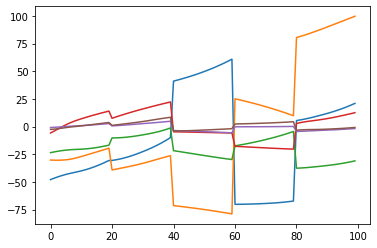

In [47]:
for j in range(6):
  plt.plot([i for i in range(100)], [principalComponents[i][j] for i in range(100)])

In [0]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [0]:
zt = principalComponents

In [0]:
x1 = []
for j in range(no_scenes):
  for i in range(18):
    x1.append([principalComponents[j*20 + i+1][0],principalComponents[j*20 + i+1][0]-principalComponents[j*20+i][0]])

In [0]:
y1 = []
for j in range(no_scenes):
  for i in range(2,20):
    y1.append(principalComponents[j*20+i][0])

In [0]:
x1 = np.array(x1)
y1 = np.array(y1)

In [159]:
x1[36]

array([41.79516303,  0.74747427])

In [156]:
y1[36]

42.56024972043787

In [0]:
regressor = LinearRegression().fit(x1,y1)

In [82]:
regressor.coef_

array([0.99999267, 1.00803367])

In [0]:
z_pred = [x1[36][0]]
z = regressor.predict([x1[38]])
z_pred.append(z[0])

for i in range(1,18):
  z_pred.append(regressor.predict([[z_pred[i],z_pred[i]-z_pred[i-1]]])[0])

In [161]:
z_pred

[41.795163034765885,
 44.16488286405482,
 46.57839210010462,
 49.03602484550194,
 51.53811756355144,
 54.085009094775316,
 56.67704067352797,
 59.31455594472656,
 61.997900980698326,
 64.72742429814548,
 67.50347687522844,
 70.32641216876831,
 73.19658613156938,
 76.11435722986242,
 79.08008646086985,
 82.09413737049333,
 85.15687607112481,
 88.26867125958195,
 91.42989423516852]

In [164]:
y1[36:52]

array([42.56024972, 43.34702701, 44.15842058, 45.00132618, 45.87753102,
       46.78775351, 47.73364849, 48.71669284, 49.73799848, 50.79709273,
       51.8973385 , 53.04162839, 54.23000117, 55.4652485 , 56.74849727,
       58.08081143])

In [0]:
z_new = []
for i in range(18):
  z_new.append([z_pred[i],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [166]:
z_new[1]

[44.16488286405482,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [0]:
z_new = pca.inverse_transform(z_new)

In [168]:
z_new[2][3]

4.493101461041161

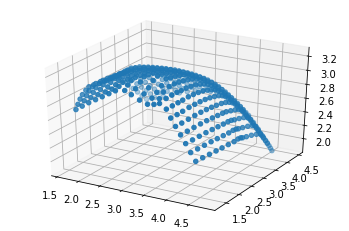

In [172]:
i=1
z_x = [z_new[i][j] for j in range(0,1200,3)]
z_y = [z_new[i][j] for j in range(1,1200,3)]
z_z =  [z_new[i][j] for j in range(2,1200,3)]
fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
ax = fig.gca(projection='3d')
ax.scatter(z_x,z_y,z_z)

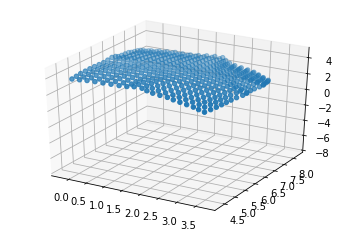

In [194]:
plot_frame(2,3)